In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [40]:
df=pd.read_csv('diabetes2.csv')

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
model_no_reg=Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_no_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\DELL\tfenv310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
history_no_reg=model_no_reg.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4960 - loss: 3.0282 - val_accuracy: 0.5528 - val_loss: 1.8246
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5406 - loss: 1.1355 - val_accuracy: 0.6179 - val_loss: 1.0931
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5986 - loss: 0.9211 - val_accuracy: 0.6667 - val_loss: 0.8487
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6322 - loss: 0.7481 - val_accuracy: 0.6179 - val_loss: 0.7873
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6687 - loss: 0.6556 - val_accuracy: 0.6341 - val_loss: 0.7951
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6531 - loss: 0.6951 - val_accuracy: 0.6260 - val_loss: 0.7634
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6485 - loss: 0.6794 - val_accuracy: 0.6829 - val_loss: 0.7050
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6860 - loss: 0.6052 - val_accuracy: 0.6748 - val

Text(0.5, 1.0, 'acc without regulariser')

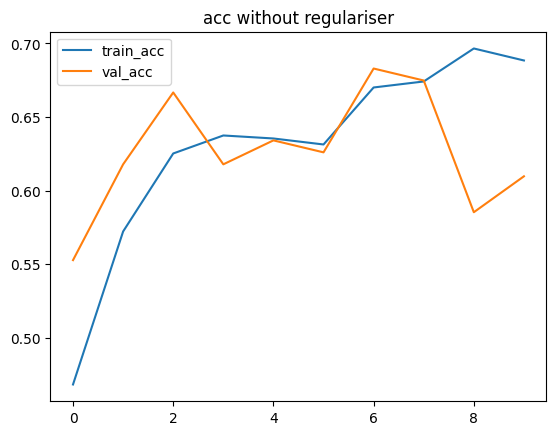

In [46]:
plt.plot(history_no_reg.history['accuracy'],label='train_acc')
plt.plot(history_no_reg.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('acc without regulariser')

In [47]:
model_with_reg=Sequential([
    Dense(256,input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.02)),
    Dense(1, activation='sigmoid')
])

model_with_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\DELL\tfenv310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
history_with_reg=model_with_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4924 - loss: 5.7861 - val_accuracy: 0.6179 - val_loss: 3.1478
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5449 - loss: 4.7027 - val_accuracy: 0.6423 - val_loss: 2.5921
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6103 - loss: 3.7544 - val_accuracy: 0.5366 - val_loss: 2.7747
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5768 - loss: 3.2038 - val_accuracy: 0.5041 - val_loss: 2.8111
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5675 - loss: 3.1957 - val_accuracy: 0.5610 - val_loss: 2.2279
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5737 - loss: 2.7114 - val_accuracy: 0.5772 - val_loss: 1.9874
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5902 - loss: 2.3848 - val_accuracy: 0.6423 - val_loss: 1.9745
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6341 - loss: 2.4847 - val_accuracy: 0.6829 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5429 - loss: 1.9655


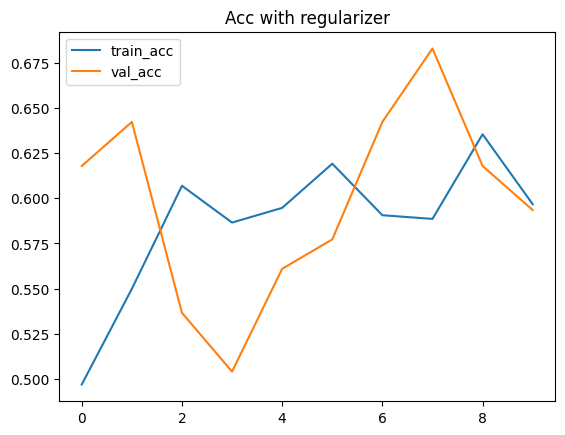

In [49]:
test_with_acc=model_with_reg.evaluate(X_test, y_test)
plt.plot(history_with_reg.history['accuracy'],label='train_acc')
plt.plot(history_with_reg.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Acc with regularizer")
plt.show()

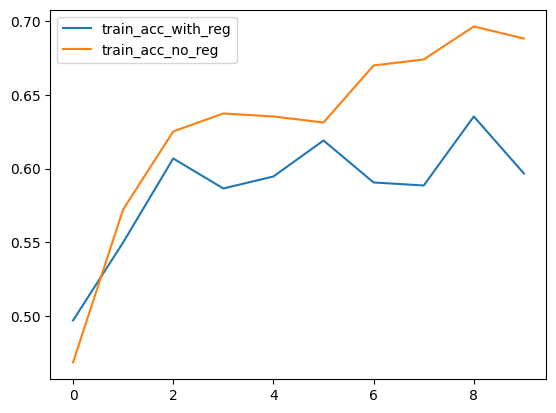

In [50]:
plt.plot(history_with_reg.history['accuracy'], label='train_acc_with_reg')
plt.plot(history_no_reg.history['accuracy'], label='train_acc_no_reg')
plt.legend()
plt.show()